## 커서로 연결 리스트 만들기

포인터를 이용한 연결 리스트는 '노드를 삽입, 삭제할 때 데이터를 이동하지 않고 처리'하는 특징이 있습니다. 하지만 노드를 삽입, 삭제할 때마다 내부에서 노드용 인스턴스를 생성하고 소멸합니다. 이때 메모리를 확보하고 해제하는 데 쓰는 비용을 결코 무시할 수 없습니다. 프로그램을 실행하면서 데이터 개수가 크게 변하지 않거나 데이터 최대 개수를 예측할 수 있는 경우라면 배열 안의 원소를 사용하여 효율적으로 운용할 수 있습니다.

여기서는 int형 정숫값인 인덱스로 나타낸 포인터를 **커서**(cursor)라고 합니다.

In [3]:
# 커서로 연결 리스트 구현하기

from __future__ import annotations
from typing import Any, Type

Null = -1

class Node:
    """연결 리스트용 노드 클래스(배열 커서 버전)"""
    
    def __init__(self, data = Null, next = Null, dnext = Null):
        """초기화"""
        self.data = data     # 데이터
        self.next = next     # 리스트의 뒤쪽 포인터
        self.dnext = dnext   # 프리 리스트의 뒤쪽 포인터
        
class ArrayLinkedList:
    """연결 리스트 클래스(배열 커서 버전)"""
    
    def __init__(self, capacity: int):
        """초기화"""
        self.head = Null                       # 머리 노드
        self.current = Null                    # 주목 노드
        self.max = Null                        # 사용 중인 꼬리 레코드
        self.deleted = Null                    # 프리 리스트의 머리 노드
        self.capacity = capacity               # 리스트의 크기
        self.n = [Node()] * self.capacity      # 리스트의 본체
        self.no = 0
        
    
    def __len__(self) -> int:
        """연결 리스트의 노드 수를 반환"""
        return self.no
    
    def get_insert_index(self):
        """다음에 삽입할 레코드의 인덱스를 구함"""
        if self.deleted == Null:               # 삭제 레코드는 존재하지 않음
            if self.max + 1 < self.capacity:
                self.max += 1
                return self.max                # 새 레코드를 사용
            else:
                return Null                    # 크기 초과
        else:
            rec = self.deleted
            self.deleted = self.n[rec].dnext    # 프리 리스트에서 맨 앞 rec를 꺼내기
            return rec
    
    def delete_index(self, idx: int) -> None:
        """레코드 idx를 프리 리스트에 등록"""
        if self.deleted == Null:                # 삭제 레코드는 존재하지 않음
            self.deleted = idx
            self.n[idx].dnext = Null            # idx를 프리 리스트의 맨 앞에 등록
        else:
            rec = self.deleted
            self.deleted = idx                  # idx를 프리 리스트의 맨 앞에 삽입
            self.n[idx].dnext = rec
            
    def search(self, data: Any) -> int:
        """data와 값이 같은 노드를 검색"""
        cnt = 0
        ptr = self.head                         # 현재 스캔 중인 노드
        while ptr != Null:
            if self.n[ptr].data == data:
                self.current = ptr
                return cnt                     # 검색 성공
            cnt += 1
            ptr = self.n[ptr].next              # 뒤쪽 노드에 주목
        return Null                            # 검색 실패
    
    def __contains__(self, data: Any) -> bool:
        """연결 리스트에 data가 포함되어 있는지 확인"""
        return self.search(data) >= 0
    
    def add_first(self, data: Any):
        """머리 노드에 삽입"""
        ptr = self.head                         # 삽입하기 전의 머리 노드
        rec = self.get_insert_index()
        if rec != Null:
            self.head = self.current = rec      # rec번째 레코드에 삽입
            self.n[self.head] = Node(data, ptr)
            self.no += 1
            
    def add_last(self, data: Any) -> None:
        """꼬리 노드에 삽입"""
        if self.head == Null:                   # 리스트가 비어 있으면
            self.add_first(data)                # 맨 앞에 노드 삽입
        else:
            ptr = self.head
            while self.n[ptr].next != Null:
                ptr = self.n[ptr].next
            rec = self.get_insert_index()
            
            if rec != Null:                     # rec번째 레코드에 삽입
                self.n[ptr].next = self.current = rec
                self.n[ptr] = Node(data)
                self.no += 1
    
    def remove_first(self) -> None:
        """머리 노드를 삭제"""
        if self.head != Null:                   # 리스트가 비어 있으면
            ptr = self.n[self.head].next
            self.delete_index(self.head)
            self.head = self.current = ptr
            self.no -= 1
            
    def remove_last(self) -> None:
        """꼬리 노드를 삭제"""
        if self.head != Null:
            if self.n[self.head].next == Null:  # 노드가 1개뿐이면
                self.remove_first()             # 머리 노드를 삭제
            else:
                ptr = self.head                 # 스캔 중인 노드
                pre = self.head                 # 스캔 중인 노드의 앞쪽 노드
                
                while self.n[ptr].next != Null:
                    pre = ptr
                    ptr = self.n[ptr].next
                self.n[ptr].next = Null         # pre는 삭제한 뒤의 꼬리 노드
                self.delete_index(ptr)
                self.current = pre
                self.no -= 1
                
    def remove(self, p: int) -> None:
        """레코드 p를 삭제"""
        if self.head != Null:
            if p == self.head:
                self.remove_first()             # p가 머리 노드면 머리 노드를 삭제
            else:
                ptr = self.head
                
                while self.n[ptr].next != p:
                    ptr = self.n[ptr].next
                    if ptr == Null:
                        return                  # p는 리스트에 존재하지 않음
                self.n[ptr].next = Null
                self.delete_index(p)
                self.n[ptr].next = self.n[p].next
                self.current = ptr
                self.no -= 1
        
    def remove_current_node(self) -> None:
        """주목 노드를 삭제"""
        self.remove(self.current)
        
    def clear(self) -> None:
        """모든 노드를 삭제"""
        while self.head != Null:               # 리스트 전체가 빌 때까지
            self.remove_first()                 # 머리 노드를 삭제
        self.current = Null
        
    def next(self) -> bool:
        """주목 노드를 한 칸 뒤로 이동"""
        if self.current == Null or self.n[self.current].next == Null:
            return False
        self.current = self.n[self.current].next
        return True
    
    
    def print_current_node(self) -> None:
        """주목 노드를 출력"""
        if self.current == Null:
            print('주목 노드가 없습니다.')
        else:
            print(self.n[self.current].data)
        
    def print(self) -> None:
        """모든 노드를 출력"""
        ptr = self.head
        
        while ptr != Null:
            print(self.n[ptr].data)
            ptr = self.n[ptr].next
            
    def dump(self) -> None:
        """배열을 덤프"""
        for i in self.n:
            print(f'[{i}] {i.data} {i.next} {i.dnext}')
    
    def __iter__(self) -> ArrayLinkedListIterator:
        """이터레이터를 반환"""
        return ArrayLinkedListIterator(self.n, self.head)
    
class ArrayLinkedListIterator:
    """클래스 ArrayLinkedList의 이터레이터용 클래스"""
    
    def __init__(self, n: int, head: int):
        self.n = n
        self.current = head
        
    def __iter__(self) -> ArrayLinkedListIterator:
        return self
    
    def __next__(self) -> Any:
        if self.current == Null:
            raise StopIteration
        else:
            data = self.n[self.current].data
            self.current = self.n[self.current].next
            return data

## 프리 리스트

연결 리스트인 프리 리스트(free list)는 삭제된 레코드 드룹을 관리할 때 사용하는 자료구조입니다. 프리 리스트를 사용하면 앞에서 발생한 삭제 후 비어 있는 배열의 문제를 해결할 수 있습니다. 데이터 자체의 순서를 나타내는 연결 리스트와 프리 리스트가 결합하므로 노드 클래스 Node와 연결 리스트 클래스 ArrayLinkedList에는 다음과 같은 필드가 추가되어 있습니다.

#### 노드 클래스 Node에 추가된 필드

- dnext: 프리 리스트의 뒤쪽 포인터(프리 리스트의 뒤쪽 노드를 참조하는 커서)입니다.

#### 연결 리스트 클래스 ArrayLinkedList에 추가된 필드

- deleted: 프리 리스트의 머리 노드를 참조하는 커서입니다.
- max: 배열에서 맨 끝 쪽에 저장되는 노드의 레코드 번호입니다.

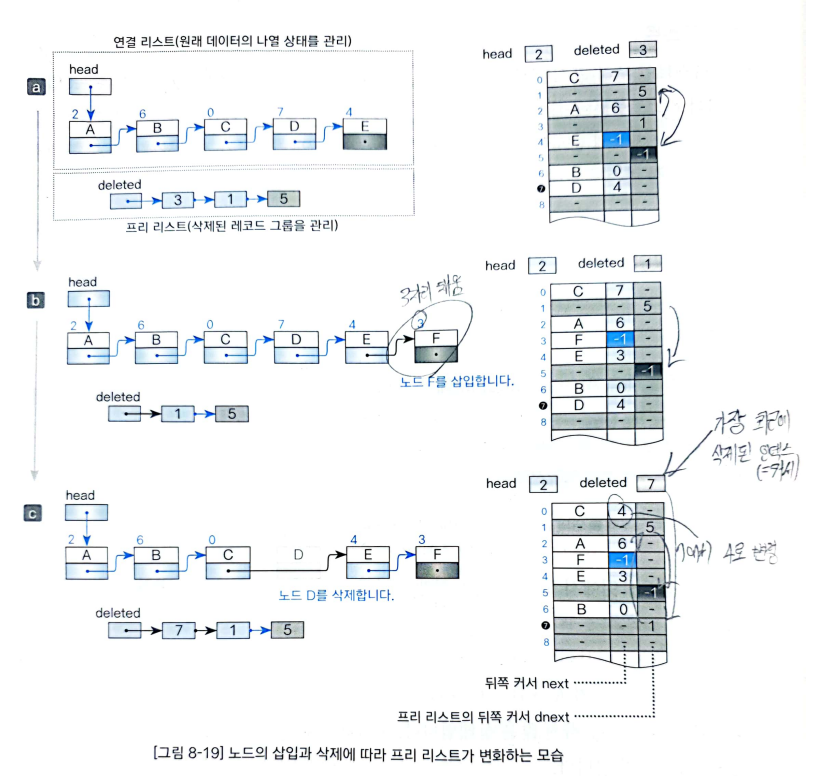

## 커서로 연결 리스트 프로그램 만들기

In [ ]:
# 커서를 이용한 선형 리스트 클래스 ArrayLinkedList 사용하기

from enum import Enum
from array_list import ArrayLinkedList

Menu = Enum('Menu', ['머리에노드삽입', '꼬리에노드삽입', '머리노드삭제',
                     '꼬리노드삭제', '주목노드출력', '주목노드이동',
                     '주목노드삭제', '모든노드삭제', '검색', '멤버십판단',
                     '모든노드출력', '스캔', '종료'])

def select_Menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep = '  ', end='')
        n = int(input(' : '))
        if 1 <= n <= len(Menu):
            return Menu(n)

lst = ArrayLinkedList(100)  # 선형 리스트를 생성

while True:
    menu = select_Menu()  # 메뉴 선택

    if menu == Menu.머리에노드삽입:               # 맨 앞에 노드 삽입
        lst.add_first(int(input('머리 노드에 넣을 값을 입력하세요.: ')))
                                    
    elif menu == Menu.꼬리에노드삽입:             # 맨 끝에 노드 삽입
        lst.add_last(int(input('꼬리 노드에 넣을 값을 입력하세요.: ')))

    elif menu == Menu.머리노드삭제:             # 맨 앞 노드를 삭제
        lst.remove_first()

    elif menu == Menu.꼬리노드삭제:             # 맨 끝 노드를 삭제
        lst.remove_last()

    elif menu == Menu.주목노드출력:             # 주목 노드를 출력
        lst.print_current_node()

    elif menu == Menu.주목노드이동:             # 주목 노드를 한 칸 뒤로 이동
        lst.next()

    elif menu == Menu.주목노드삭제:             # 주목 노드를 삭제
        lst.remove_current_node()

    elif menu == Menu.모든노드삭제:             # 모두 삭제
        lst.clear()

    elif menu == Menu.검색:                     # 검색
        pos = lst.search(int(input('검색할 값을 입력하세요.: ')))
        if pos >= 0:
            print(f'이 키를 갖는 데이터는 {pos + 1}번째에 있습니다.')
        else:
            print('해당 데이터가 없습니다.')

    elif menu == Menu.멤버십판단:               # 멤버십을 판단
        print('그 값의 데이터는 포함되어'
              +('있습니다.' if int(input('판단할 값을 입력하세요.')) in lst else ' 있지 않습니다.'))

    elif menu == Menu.모든노드출력:             # 모든 노드를 출력
        lst.print()

    elif menu == Menu.스캔:                     # 모든 노드 스캔
        for e in lst:
             print(e)

    else:                                       # 종료
        break